In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2020)

In [3]:
time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time) + np.random.random(361))

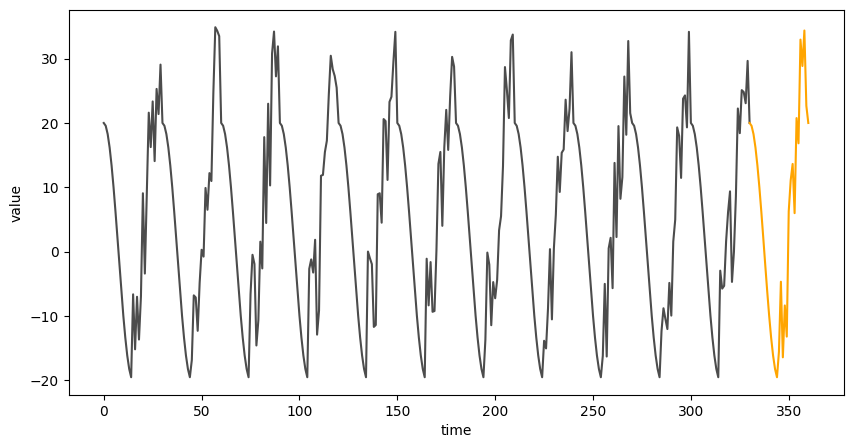

In [4]:
plt.figure(figsize = (10, 5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(np.arange(0, 30 * 11 + 1),
        time_series[:30 * 11 + 1],
        color = 'black',
        alpha = 0.7)

plt.plot(np.arange(30 * 11, 30 * 12 + 1),
         time_series[30 * 11:],
         color = 'orange')

In [5]:
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10 # 주기 설정
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

In [6]:
# 학습용 및 테스트용 데이터 분리
patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('partial_train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

partial_train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [7]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 10)

for i in range(1, 4):
    print(a[i],'|', b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


In [9]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(patial_x_train, patial_y_train, epochs = 200, batch_size = 12)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 232.7180
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 200.9115
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172.8394
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154.7220
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132.7444
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.3163
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.8629 
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116.3956
Epoch 9/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.9947
Epoch 10/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.4220   
Epoch 11/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.1237 
Epoch 12/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.9171
Epoch 13/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.3207
Epoch 14/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.4366
Epoch 15/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


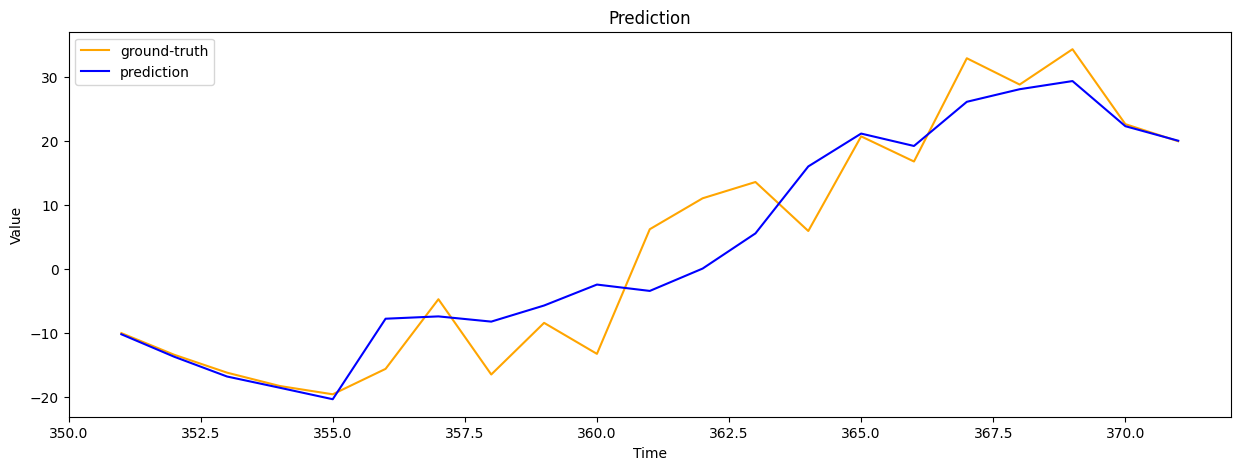

In [11]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='ground-truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

In [12]:
from tensorflow.keras.datasets import imdb

# 1 ~ 10,000 빈도 순위에 해당하는 단어만 사용합니다.
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 각 데이터의 최대 길이를 500으로 동일하게 맞춰줍니다.
max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
# 새로운 인자 3개가 사용되었습니다.
# return_sequences, dropout, recurrent_dropout
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15, recurrent_dropout = 0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

# model.summary()
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 109ms/step - acc: 0.5130 - loss: 0.7041 - val_acc: 0.5666 - val_loss: 0.6751
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - acc: 0.5882 - loss: 0.6648 - val_acc: 0.7000 - val_loss: 0.5779
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - acc: 0.7206 - loss: 0.5449 - val_acc: 0.6420 - val_loss: 0.6234
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - acc: 0.7231 - loss: 0.5379 - val_acc: 0.6510 - val_loss: 0.6041
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - acc: 0.7531 - loss: 0.5053 - val_acc: 0.6696 - val_loss: 0.5915
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - acc: 0.7547 - loss: 0.4984 - val_acc: 0.7510 - val_loss: 0.5285
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - acc: 0.7776 - loss: 0.4688 - val_acc: 0.7242 - val_loss: 0.5512
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - acc: 0.8154 - loss: 0.4053 - val_acc: 0.7360 - val_loss: 0.5444
Epoch 9/15
625/625 ━━━━━━━━━━━━━

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = 10000, output_dim = 32))
# 전체 상태 시퀀스를 반환하거나,
# 마지막 시점의 상태 시퀀스만 반환합니다.
# 주석을 바꿔가면서 출력값 변화를 확인해보세요!
model.add(SimpleRNN(32, return_sequences = True))
# model.add(SimpleRNN(32, return_sequences = False))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

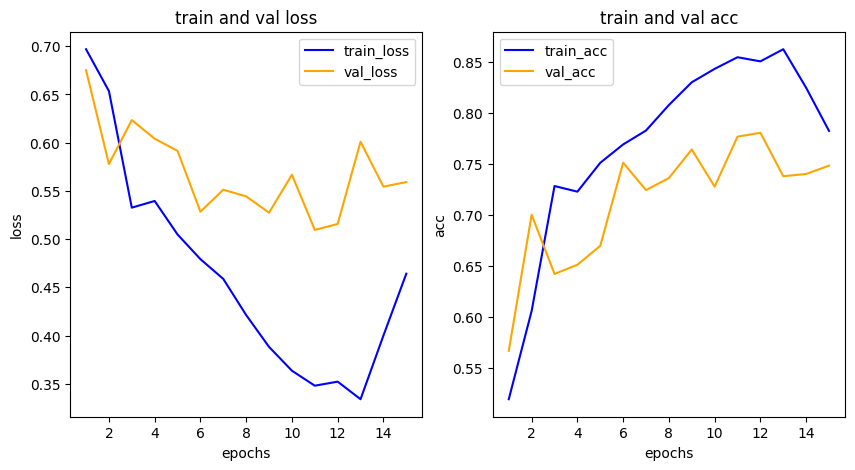

In [16]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()